Detected car with confidence 0.992 at location [419.5, 227.82, 474.93, 318.81]
Detected truck with confidence 0.967 at location [-0.02, 84.78, 82.9, 329.5]
Detected person with confidence 0.989 at location [157.01, 143.89, 301.24, 402.96]
Detected truck with confidence 0.992 at location [100.76, 86.95, 264.28, 314.54]
Detected car with confidence 0.999 at location [463.07, 215.5, 596.92, 338.76]
Detected truck with confidence 0.914 at location [-0.26, 153.99, 93.43, 355.11]
Detected bicycle with confidence 0.998 at location [208.08, 319.83, 264.71, 439.93]
Detected car with confidence 0.999 at location [288.12, 210.55, 459.09, 350.55]
Detected person with confidence 0.988 at location [415.51, 195.78, 429.87, 224.01]
Detected car with confidence 0.987 at location [75.99, 216.48, 109.15, 300.76]
Detected car with confidence 0.998 at location [558.17, 205.91, 810.49, 362.51]
Detected car with confidence 0.992 at location [750.16, 196.52, 871.99, 348.46]
Detected car with confidence 0.945 

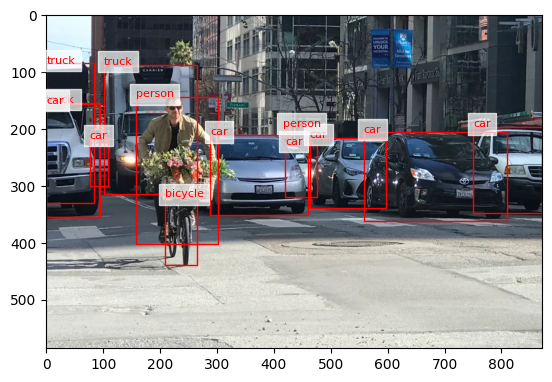

In [12]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

url = "https://miro.medium.com/v2/resize:fit:1400/format:webp/1*EYFejGUjvjPcc4PZTwoufw.jpeg"
image = Image.open(requests.get(url, stream=True).raw)

processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-101")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-101")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )
    
labels = results["labels"]
boxes = results["boxes"]

image_np = image.convert("RGB")
# image_np = torch.Tensor(np.array(image_np))

fig, ax = plt.subplots()

for label, box in zip(labels, boxes):
    label_name = model.config.id2label[label.item()]
    box = box.tolist()

    # Draw the bounding box rectangle
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    # Add label text near the bounding box
    ax.text(box[0], box[1], label_name, color='r', fontsize=8, bbox=dict(facecolor='white', edgecolor='white', alpha=0.7))

ax.imshow(image_np)
    